## ABS Visualizations

In [1]:
import pandas as pd
business_characteristics = pd.read_csv('characteristics-of-a-business.csv')
# company_summary = pd.read_csv('company_summary_data.csv')
import numpy as np #computational tool
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import math 
import re

## Company Summary 

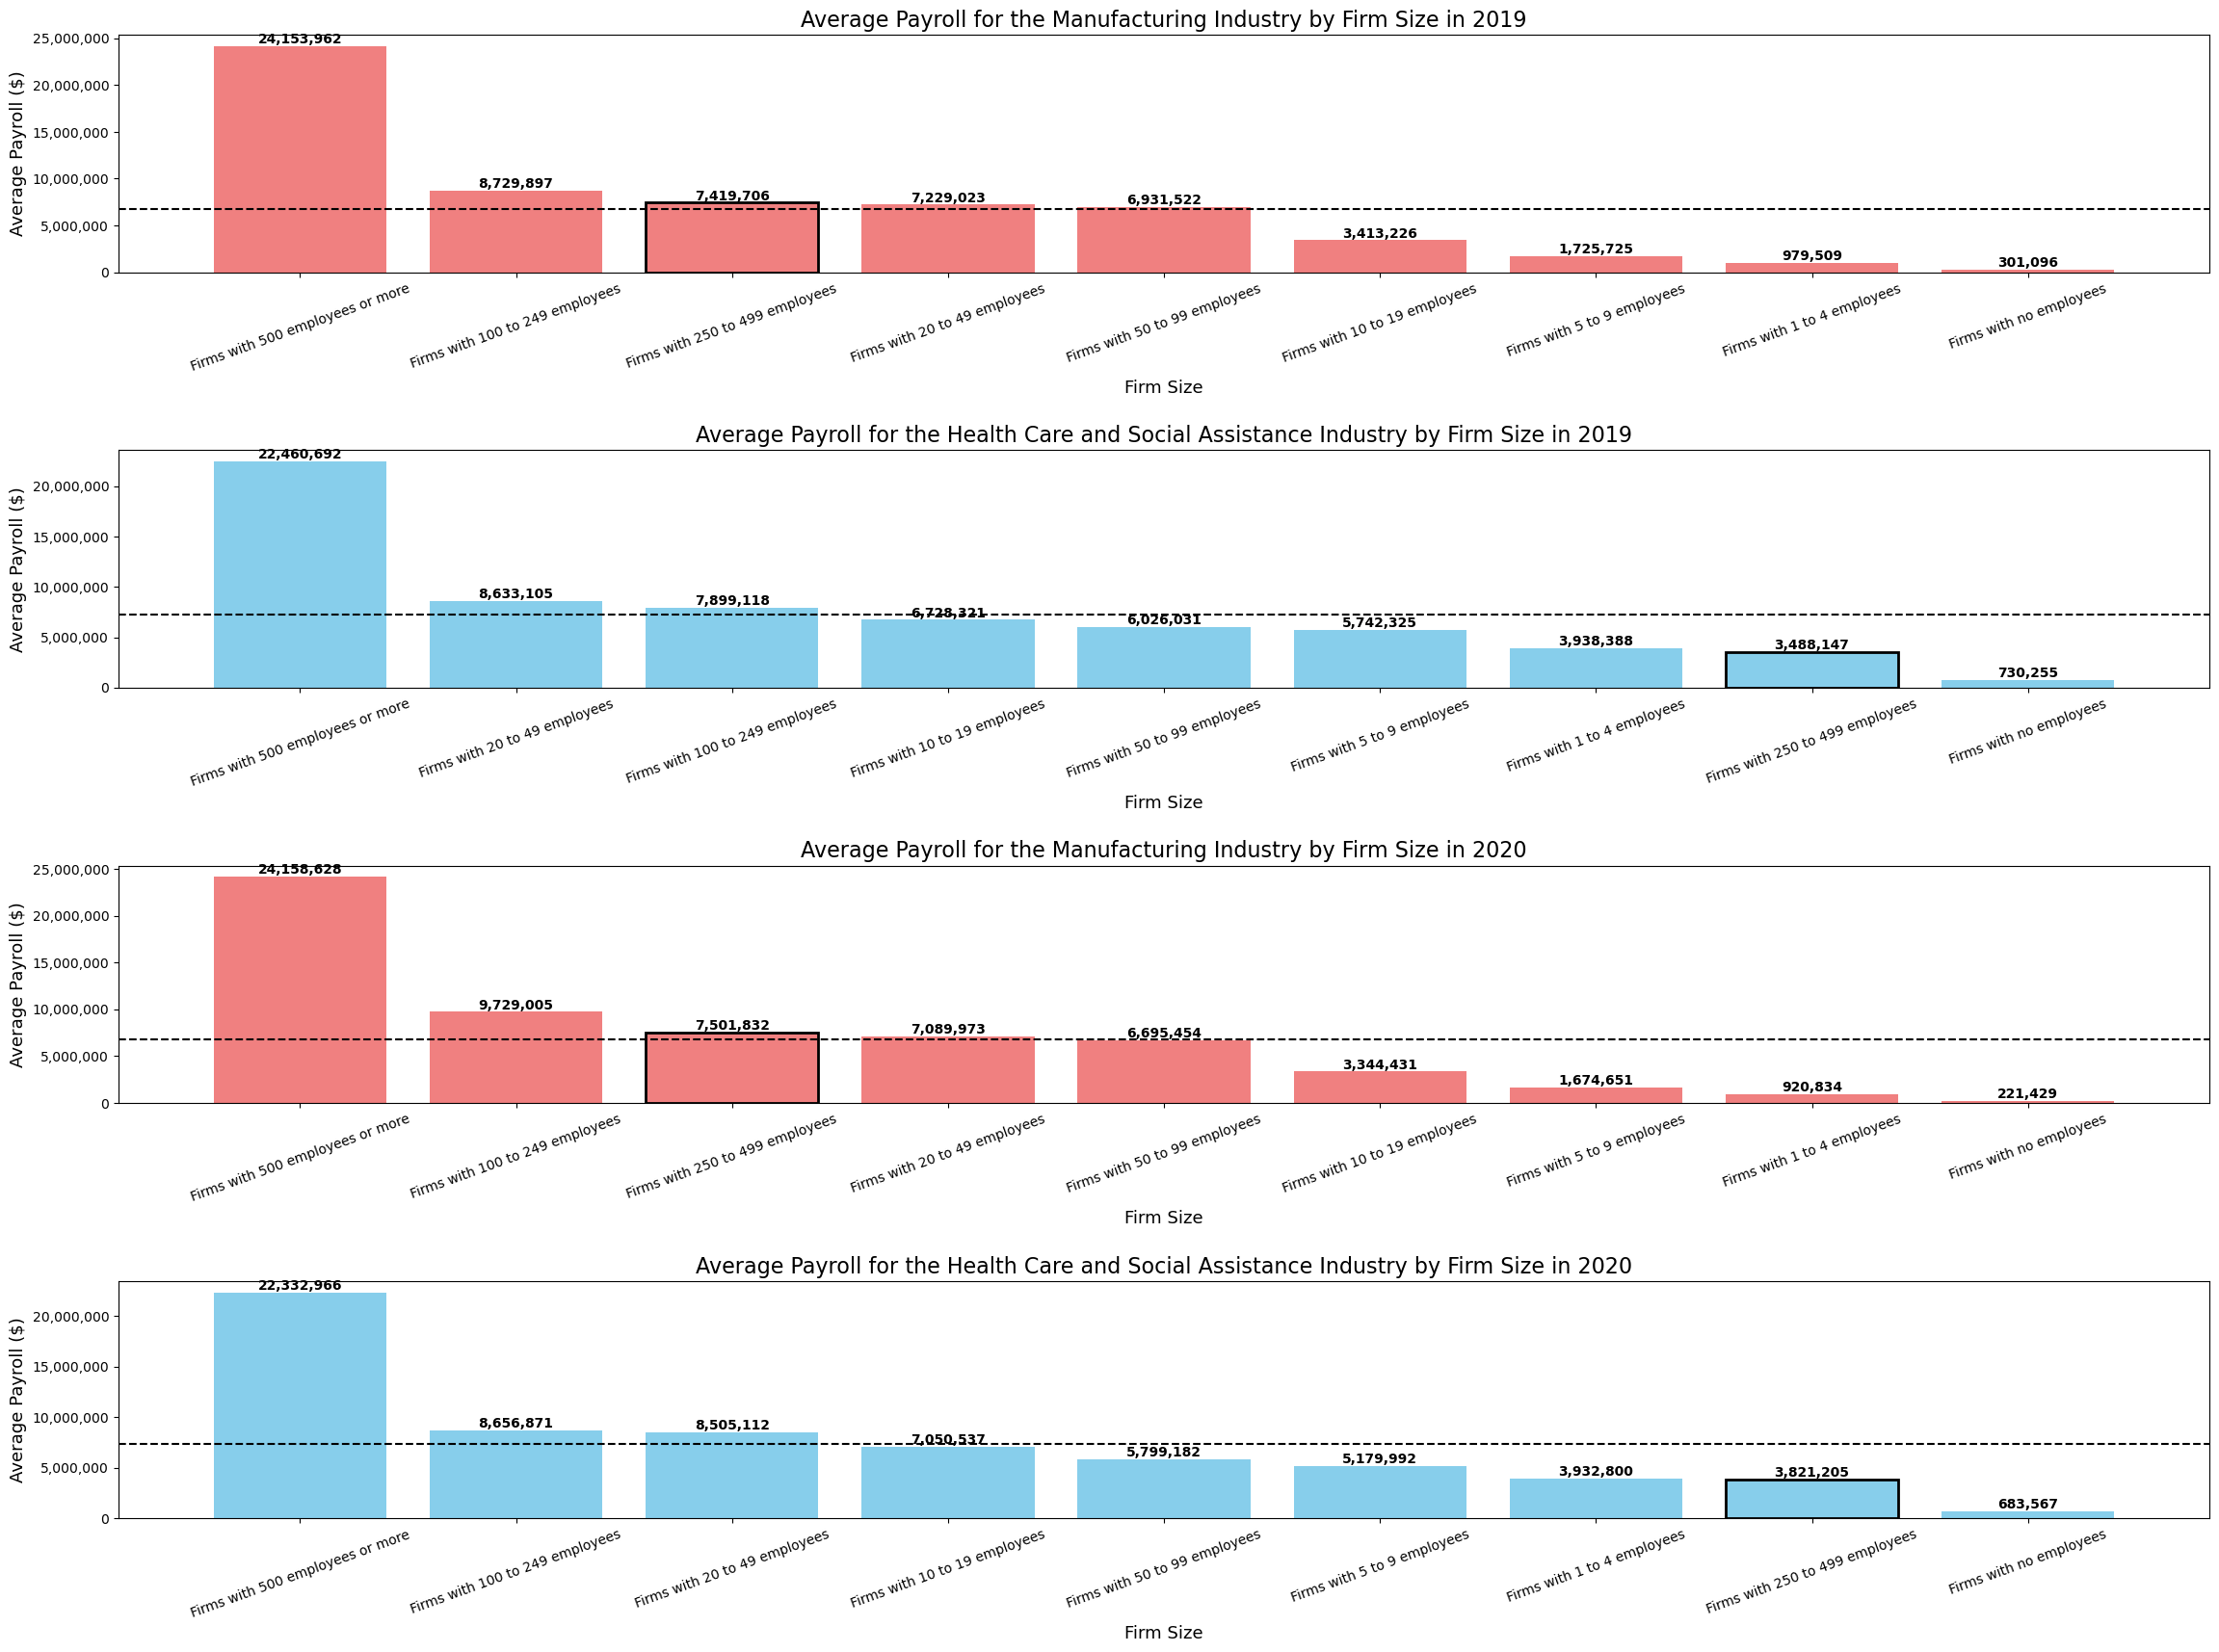

In [7]:
# Creating my first figure comparing data from 2019 and 2020 for the 
# Manufacturing and Healthcare and social assistance industries
# Comparing annual payrolls vs the number of employees 

# Establish figure size.
plt.figure(figsize = (28, 20));
plt.subplots_adjust(wspace=0.75, hspace=0.75);

# We can create subplots, which allows us to have multiple subplots in the same plot.
ax1 = plt.subplot(4, 1, 1);
ax1.set_title('Average Payroll for the Manufacturing Industry by Firm Size in 2019', size = 16);
ax1.set_xlabel('Firm Size', size = 13);
ax1.set_ylabel('Average Payroll ($)', size = 13);
# filtering our data 
filtered_data = company_summary[(company_summary['NAICS2017_LABEL'] == 'Manufacturing') & (company_summary['EMPSZFI_LABEL'] != 'All firms') & (company_summary['EMPSZFI_LABEL'] != 'Firms with less than 500 employees') & (company_summary['YEAR'] == 2019)];
# grouping our data 
grouped_EMPSZFI = filtered_data.groupby('EMPSZFI_LABEL');

# Get the firm size labels
x = list(grouped_EMPSZFI.groups.keys());  # get the group keys as a list

# Get the average sales for each firm size
y = grouped_EMPSZFI['PAYANN'].mean().values;  
# Descending values 
y_sorted, x_sorted = zip(*sorted(zip(y, x), reverse=True));
# This gives me my datalabels
for x_val, y_val in zip(x_sorted, y_sorted):
    plt.text(x_val, y_val, f'{y_val:,.0f}', ha='center', verticalalignment='bottom');
# boldens my datalabels 
for label in ax1.texts:
    label.set_fontweight('bold');


# Create the bar chart
ax1.bar(x_sorted, y_sorted, color = 'lightcoral');

# rotates my x-axis labels 
plt.xticks(x,rotation=20);
# This changed the format of my y-axis to integers
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')));

# Calculate the average of the data series
mean_y = np.mean(y);

# Add a horizontal line at the average value
ax1.axhline(y=mean_y, color='black', linestyle='--');

# Get the x- and y-coordinates of the third highest bar
x_coord = x_sorted[2];  # x-coordinate is the label of the bar
y_coord = y_sorted[2]; # y-coordinate is the height of the bar
bar_width = 0.8; # width of the bar
bar_height = y_coord; # height of the bar

# Draw a rectangle around the bar
plt.bar(x_coord, bar_height, width=bar_width, edgecolor='black', linewidth=2, facecolor='none');

# **SUBPLOT 2**

ax2 = plt.subplot(4, 1, 2);
ax2.set_title('Average Payroll for the Health Care and Social Assistance Industry by Firm Size in 2019', size = 16)
ax2.set_xlabel('Firm Size', size = 13);
ax2.set_ylabel('Average Payroll ($)', size = 13);
# filtering the data 
filtered_data = company_summary[(company_summary['NAICS2017_LABEL'] == 'Health care and social assistance') & (company_summary['EMPSZFI_LABEL'] != 'All firms') & (company_summary['EMPSZFI_LABEL'] != 'Firms with less than 500 employees') & (company_summary['YEAR'] == 2019)];

# grouping the data 
grouped_EMPSZFI = filtered_data.groupby('EMPSZFI_LABEL');

# Get the firm size labels
x = list(grouped_EMPSZFI.groups.keys());  # get the group keys as a list

# Get the average sales for each firm size
y = grouped_EMPSZFI['PAYANN'].mean().values; 

# Values are in descending order 
y_sorted, x_sorted = zip(*sorted(zip(y, x), reverse=True));
# This gives me my datalabels
for x_val, y_val in zip(x_sorted, y_sorted):
    plt.text(x_val, y_val, f'{y_val:,.0f}', ha='center', verticalalignment='bottom');
# boldens my datalabels 
for label in ax2.texts:
    label.set_fontweight('bold')


# Create the bar chart
ax2.bar(x_sorted, y_sorted, color = 'skyblue');
# rotates x-axis labels 
plt.xticks(x,rotation=20);
# This changed the format of my y-axis to integers
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')));

# Calculate the average of the data series
mean_y = np.mean(y);

# Add a horizontal line at the average value
ax2.axhline(y=mean_y, color='black', linestyle='--');

x_coord = x_sorted[-2];  # x-coordinate is the label of the bar
y_coord = y_sorted[-2];  # y-coordinate is the height of the bar
bar_width = 0.8;  # width of the bar
bar_height = y_coord;  # height of the bar

# Draw a rectangle around the bar
plt.bar(x_coord, bar_height, width=bar_width, edgecolor='black', linewidth=2, facecolor='none');

# **SUBPLOT 3**

ax3 = plt.subplot(4, 1, 3);
ax3.set_title('Average Payroll for the Manufacturing Industry by Firm Size in 2020', size = 16)
ax3.set_xlabel('Firm Size', size = 13);
ax3.set_ylabel('Average Payroll ($)', size = 13);
# filters the data 
filtered_data = company_summary[(company_summary['NAICS2017_LABEL'] == 'Manufacturing') & (company_summary['EMPSZFI_LABEL'] != 'All firms') & (company_summary['EMPSZFI_LABEL'] != 'Firms with less than 500 employees') & (company_summary['YEAR'] == 2020)];

# groups the data 
grouped_EMPSZFI = filtered_data.groupby('EMPSZFI_LABEL');

x = list(grouped_EMPSZFI.groups.keys());

y = grouped_EMPSZFI['PAYANN'].mean().values; 

# Descending Values 
y_sorted, x_sorted = zip(*sorted(zip(y, x), reverse=True));
# This gives me my datalabels
for x_val, y_val in zip(x_sorted, y_sorted):
    plt.text(x_val, y_val, f'{y_val:,.0f}', ha='center', verticalalignment='bottom');
# boldens my datalabels 
for label in ax3.texts:
    label.set_fontweight('bold');


# Create the bar chart
ax3.bar(x_sorted, y_sorted, color = 'lightcoral');

plt.xticks(x,rotation=20);
# This changed the format of my y-axis to integers
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')));

# Calculate the average of the data series
mean_y = np.mean(y);

# Add a horizontal line at the average value
ax3.axhline(y=mean_y, color='black', linestyle='--');

x_coord = x_sorted[2];  # x-coordinate is the label of the bar
y_coord = y_sorted[2];  # y-coordinate is the height of the bar
bar_width = 0.8;  # width of the bar
bar_height = y_coord;  # height of the bar

# Draw a rectangle around the bar
plt.bar(x_coord, bar_height, width=bar_width, edgecolor='black', linewidth=2, facecolor='none');

# **SUBPLOT 4**

ax4 = plt.subplot(4, 1, 4);
ax4.set_title('Average Payroll for the Health Care and Social Assistance Industry by Firm Size in 2020', size = 16)
ax4.set_xlabel('Firm Size', size = 13);
ax4.set_ylabel('Average Payroll ($)', size = 13);
# filters the data
filtered_data = company_summary[(company_summary['NAICS2017_LABEL'] == 'Health care and social assistance') & (company_summary['EMPSZFI_LABEL'] != 'All firms') & (company_summary['EMPSZFI_LABEL'] != 'Firms with less than 500 employees') & (company_summary['YEAR'] == 2020)];

# groups the data 
grouped_EMPSZFI = filtered_data.groupby('EMPSZFI_LABEL');

# Get the firm size labels
x = list(grouped_EMPSZFI.groups.keys());  # get the group keys as a list

# Get the average sales for each firm size
y = grouped_EMPSZFI['PAYANN'].mean().values;  # get the values of the 'PAYANN' column as a NumPy array

# Values are in descending order 
y_sorted, x_sorted = zip(*sorted(zip(y, x), reverse=True));
# This gives me my datalabels
for x_val, y_val in zip(x_sorted, y_sorted):
    plt.text(x_val, y_val, f'{y_val:,.0f}', ha='center', verticalalignment='bottom');
# boldens my datalabels 
for label in ax4.texts:
    label.set_fontweight('bold');


# Create the bar chart
ax4.bar(x_sorted, y_sorted, color = 'skyblue');

plt.xticks(x,rotation=20);
# This changed the format of my y-axis to integers
ax4.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')));

# Calculate the average of the data series
mean_y = np.mean(y);

# Add a horizontal line at the average value
ax4.axhline(y=mean_y, color='black', linestyle='--');

x_coord = x_sorted[-2];  # x-coordinate is the label of the bar
y_coord = y_sorted[-2];  # y-coordinate is the height of the bar
bar_width = 0.8;  # width of the bar
bar_height = y_coord;  # height of the bar

# Draw a rectangle around the bar
plt.bar(x_coord, bar_height, width=bar_width, edgecolor='black', linewidth=2, facecolor='none');


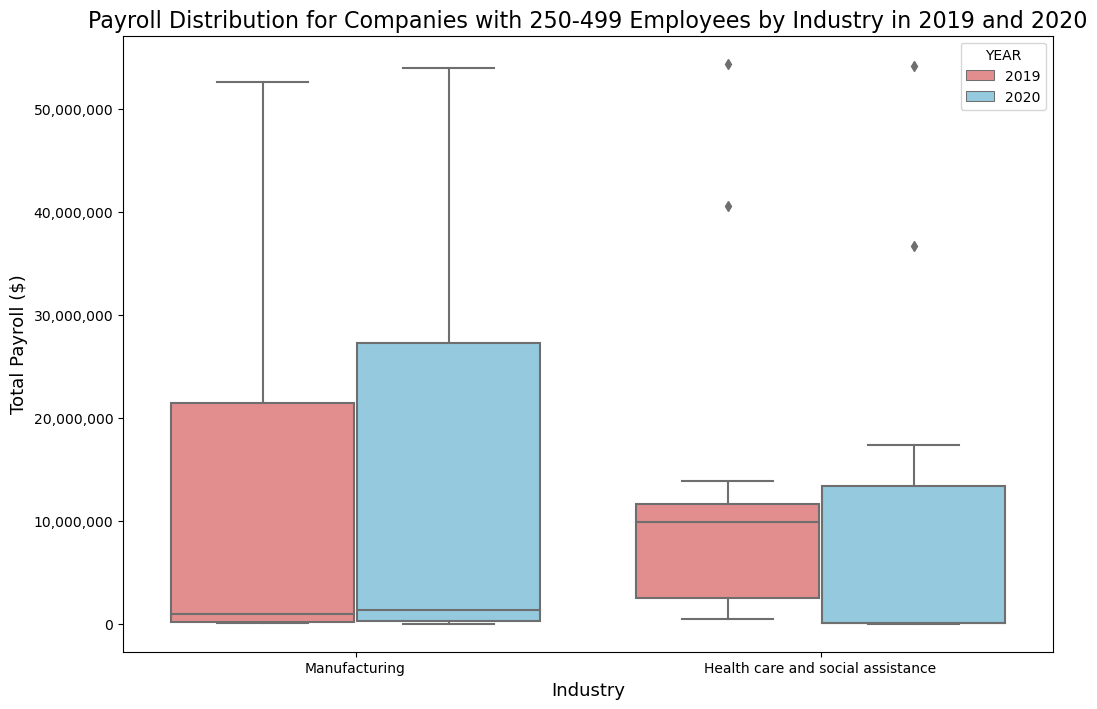

In [9]:
plt.figure(figsize=(12,8))

# Filter the data to include only the desired industries and firm sizes
filtered_df = company_summary[(company_summary['NAICS2017_LABEL'].isin(['Manufacturing', 'Health care and social assistance'])) & (company_summary['PAYANN'] > 0) & (company_summary['EMPSZFI_LABEL'] == 'Firms with 250 to 499 employees') & (company_summary['YEAR'].isin([2019,2020]))]

# Grouped our data so that we only get the 2 industries we're concerned about 
grouped_df = filtered_df.groupby(['NAICS2017_LABEL'])


# Create the boxplot
sns.boxplot(x='NAICS2017_LABEL', y='PAYANN', hue = 'YEAR', data=filtered_df, showfliers=True, palette = ['lightcoral', 'skyblue'])

plt.xlabel('Industry', size=13)

# Set the y-axis label
plt.ylabel('Total Payroll ($)', size=13)

# Set the plot title
plt.title('Payroll Distribution for Companies with 250-499 Employees by Industry in 2019 and 2020', size=16)

# Formats my y-axis
plt.gca().yaxis.get_major_formatter().set_scientific(False)
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Show the plot
plt.show()


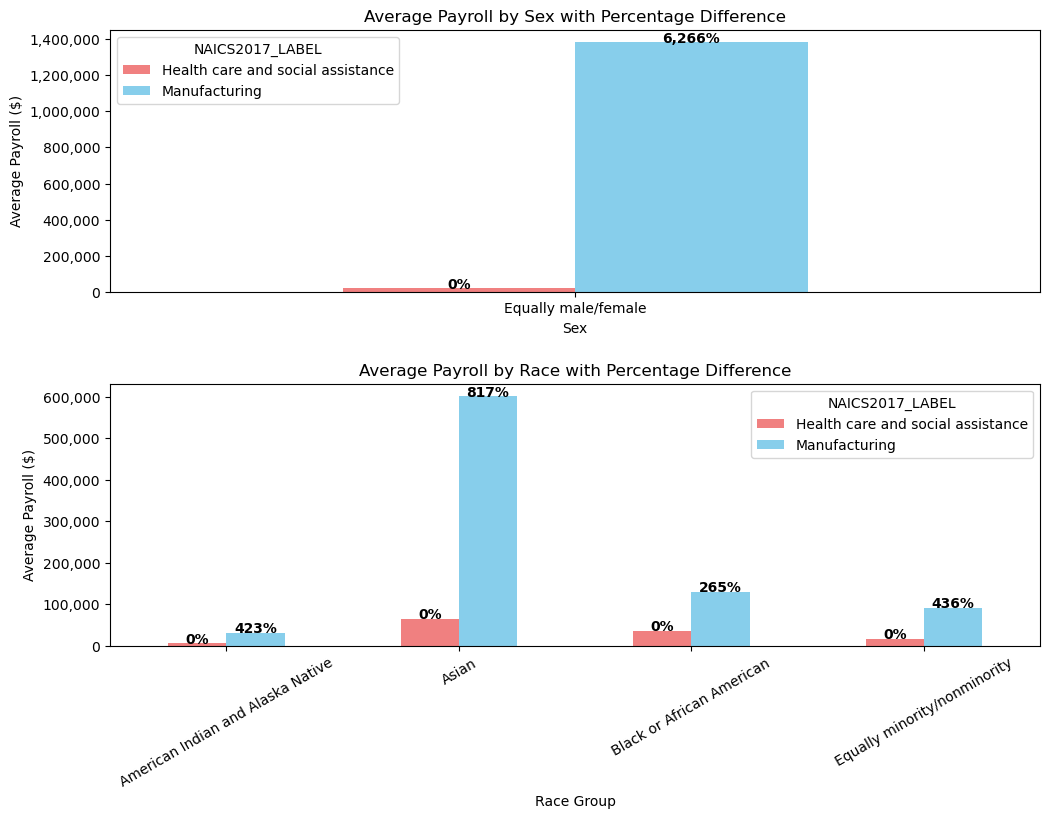

In [5]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))
fig.subplots_adjust(wspace=1, hspace=.35)
colors = ['lightcoral', 'skyblue']

# Create the first chart in the first subplot
filtered_sex = company_summary[(company_summary['NAICS2017_LABEL'].isin(['Manufacturing', 'Health care and social assistance'])) & 
                              (company_summary['PAYANN'] > 0) & 
                              (company_summary['EMPSZFI_LABEL'] == 'Firms with 250 to 499 employees') & 
                              (company_summary['YEAR'].isin([2019,2020]))]

filtered_sex = filtered_sex[~filtered_sex['SEX_LABEL'].isin(['Total','Classifiable', 'Unclassifiable', 'Male', 'Female'])]


# Group the data by the x-axis and y-axis variables
grouped_sex = filtered_sex.groupby(['SEX_LABEL', 'NAICS2017_LABEL'])

# Reshape the data for a grouped bar chart
grouped_sex = grouped_sex['PAYANN'].mean().unstack()

# Create the grouped bar chart
grouped_sex.plot.bar(ax=ax1, xlabel='Sex', ylabel='Average Payroll ($)', title=('Average Payroll by Sex with Percentage Difference'), color=colors)



# First plot
first_bar_values = [patch.get_height() for patch in ax1.containers[0]]
xlim, ylim = ax1.get_xlim(), ax1.get_ylim()
for i, bar in enumerate(ax1.containers):
    for j, patch in enumerate(bar):
        height = patch.get_height()
        if j == 0:  # Skip the first patch
            difference = height - first_bar_values[j]
            percentage_difference = (difference / first_bar_values[j]) * 100
            if not math.isnan(percentage_difference) and not math.isinf(percentage_difference):
                ax1.text(xlim[0] + (xlim[1] - xlim[0]) * (patch.get_x() + patch.get_width()/2) + .5, height, f'{percentage_difference:,.0f}%', ha='center')
        elif j != 0:  # Skip the first patch
            difference = height - first_bar_values[j]
            percentage_difference = (difference / first_bar_values[j]) * 100
            if not math.isnan(percentage_difference) and not math.isinf(percentage_difference):
                ax1.text(xlim[0] + (xlim[1] - xlim[0]) * (patch.get_x() + patch.get_width()/2), height, f'{percentage_difference:,.0f}%', ha='center')
# This changed the format of my y-axis to integers
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')));
ax1.set_xticklabels(grouped_sex.index, rotation='horizontal')

for label in ax1.texts:
    label.set_fontweight('bold')

# SUBPLOT 2
# Filter the data to include only the desired industries and firm sizes
filtered_race = company_summary[(company_summary['NAICS2017_LABEL'].isin(['Manufacturing', 'Health care and social assistance'])) & 
                              (company_summary['PAYANN'] > 0) & 
                              (company_summary['EMPSZFI_LABEL'] == 'Firms with 250 to 499 employees') & 
                              (company_summary['YEAR'].isin([2019,2020]))]

filtered_race = filtered_race[~filtered_race['RACE_GROUP_LABEL'].isin(['Total', 'Nonminority', 'Minority', 'Classifiable', 'Unclassifiable', 'White'])]


# Group the data by the x-axis and y-axis variables
grouped_race = filtered_race.groupby(['RACE_GROUP_LABEL', 'NAICS2017_LABEL'])

# Reshape the data for a grouped bar chart
grouped_race = grouped_race['PAYANN'].mean().unstack()

# Create the grouped bar chart
grouped_race.plot.bar(ax=ax2, xlabel='Race Group', ylabel='Average Payroll ($)', title='Average Payroll by Race with Percentage Difference', color=colors)


# Add data labels to the bars
# for bar in plt.gca().containers:
#     for patch in bar:
#         height = patch.get_height()
#         plt.text(patch.get_x() + patch.get_width()/2, height, f'{height:,.0f}', ha='center')


first_bar_values = [patch.get_height() for patch in ax2.containers[0]]
xlim, ylim = ax2.get_xlim(), ax2.get_ylim()
for i, bar in enumerate(ax2.containers):
    for j, patch in enumerate(bar):
        height = patch.get_height()
        difference = height - first_bar_values[j]
        percentage_difference = (difference / first_bar_values[j]) * 100
        if not math.isnan(percentage_difference) and not math.isinf(percentage_difference):
            ax2.text(patch.get_x() + patch.get_width()/2, height, f'{percentage_difference:,.0f}%', ha='center')



ax2.set_xticks(range(len(grouped_race.index)))
ax2.set_xticklabels(grouped_race.index, rotation=30)
for label in ax2.texts:
    label.set_fontweight('bold')

ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')));



## Characteristics of Businesses


In [4]:
# Decided to rename my columns to make them easier to understand
business_characteristics.rename(columns = {'NAICS2017_LABEL': 'Industry',
                                           'SEX_LABEL': 'Sex',
                                           'ETH_GROUP_LABEL': 'Ethnicity',
                                           'RACE_GROUP_LABEL': 'Race',
                                           'VET_GROUP_LABEL': 'Veteran',
                                           'QDESC_LABEL': 'QuestionDescr',
                                           'BUSCHAR': 'SurveyQuestion',
                                           'BUSCHAR_LABEL': 'SurveyQuestionAnswer',
                                           'YIBSZFI_LABEL': 'YearsinBusiness',
                                           'EMPSZFI_LABEL': 'EmployeeSize',
                                           'RCPSZFI_LABEL': 'RevenueSize',
                                           'YEAR': 'Year',
                                           'FIRMPDEMP': 'EmployerFirms',
                                           'RCPPDEMP': 'Revenue',
                                           'EMP': 'NumberofEmployees',
                                           'PAYANN': 'Pay' 
                                          }, inplace = True)


In [5]:
# Compared the different years I had to see the amount of data each year contained 
business_characteristics['Year'].value_counts()

2020    1293343
2019     350790
2017     216323
2018      48737
Name: Year, dtype: int64

In [6]:
# Decided that 2020 had the most data which is why I filtered my years to only show 2020
business_characteristics = business_characteristics[business_characteristics['Year'] == 2020] 

In [7]:
#want to see industries that are black owned 
#made a new table to show only the information I needed for my graphs
business_race = business_characteristics.copy()
business_race = business_race [['Industry', 'Race', 'Pay', 'EmployerFirms']]
#I did not want to see the total, classifiable, and unclassifiable but only useful rows
business_race = business_race[(business_race['Race'] != 'Total')&(business_race['Race'] !='Classifiable')&(business_race['Race']!='Unclassifiable')&(business_race['Race']=='Black or African American')]
business_race = business_race.groupby(['Industry','Race'],as_index=False).sum()
business_race.head(20)




,Industry,Race,Pay,EmployerFirms
0,Accommodation,Black or African American,204750,770
1,Accommodation and food services,Black or African American,89320146,379123
2,"Accounting, tax preparation, bookkeeping, and ...",Black or African American,12301314,142702
3,Activities related to credit intermediation,Black or African American,0,0
4,Activities related to real estate,Black or African American,2188273,18496
5,Administrative and support and waste managemen...,Black or African American,296121091,638084
6,Administrative and support services,Black or African American,282049715,610950
7,"Advertising, public relations, and related ser...",Black or African American,9181068,25760
8,Aerospace product and parts manufacturing,Black or African American,64690,130
9,"Agencies, brokerages, and other insurance rela...",Black or African American,17802385,137460


In [8]:
# top 10 industries that are black owned 
#used the table I created and sorted it by employerfirms
black_industry = business_race.sort_values( by = 'EmployerFirms', ascending = False).head(10)
#I did not want to include total for all sectors in my graph 
black_industry = black_industry[(black_industry['Industry'] != 'Total for all sectors')]
black_industry

,Industry,Race,Pay,EmployerFirms
201,"Professional, scientific, and technical services",Black or African American,663887108,2210776
104,Health care and social assistance,Black or African American,591725481,2038621
13,Ambulatory health care services,Black or African American,372270903,1187804
223,Social assistance,Black or African American,153291529,656586
5,Administrative and support and waste managemen...,Black or African American,296121091,638084
6,Administrative and support services,Black or African American,282049715,610950
53,Construction,Black or African American,135889082,477429
248,Transportation and warehousing,Black or African American,109851963,436081
178,Other services (except public administration),Black or African American,39889265,433612


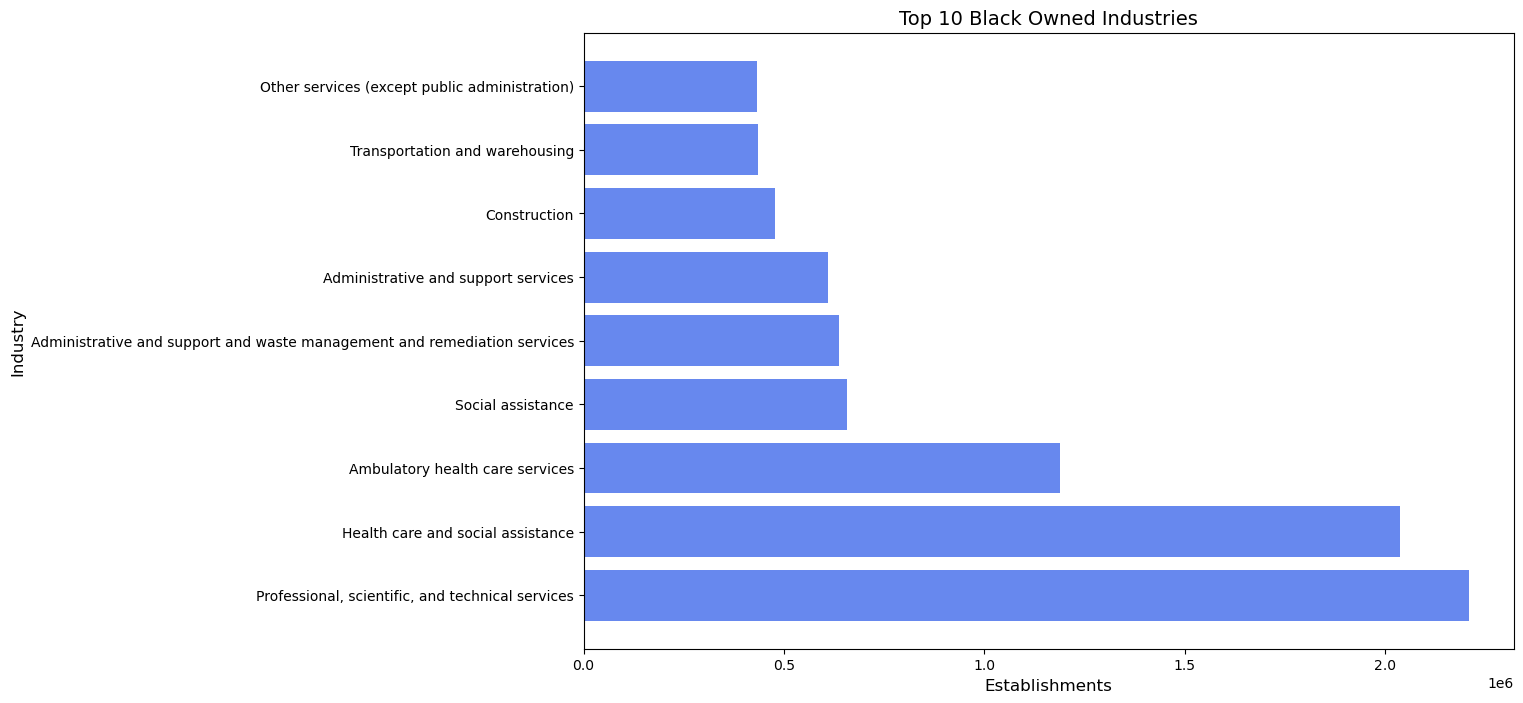

In [9]:
# Used matplotlib to graph my table, but the xaxis used scienfic notation 
# changed the size 
plt.figure(figsize = (12,8))

# made a horizontal graph of my table
plt.barh(y = black_industry['Industry'], width = black_industry['EmployerFirms']);



# #add descriptive title

plt.title('Top 10 Black Owned Industries', size = 14)
plt.ylabel('Industry', size = 12)
plt.xlabel('Establishments', size = 12);

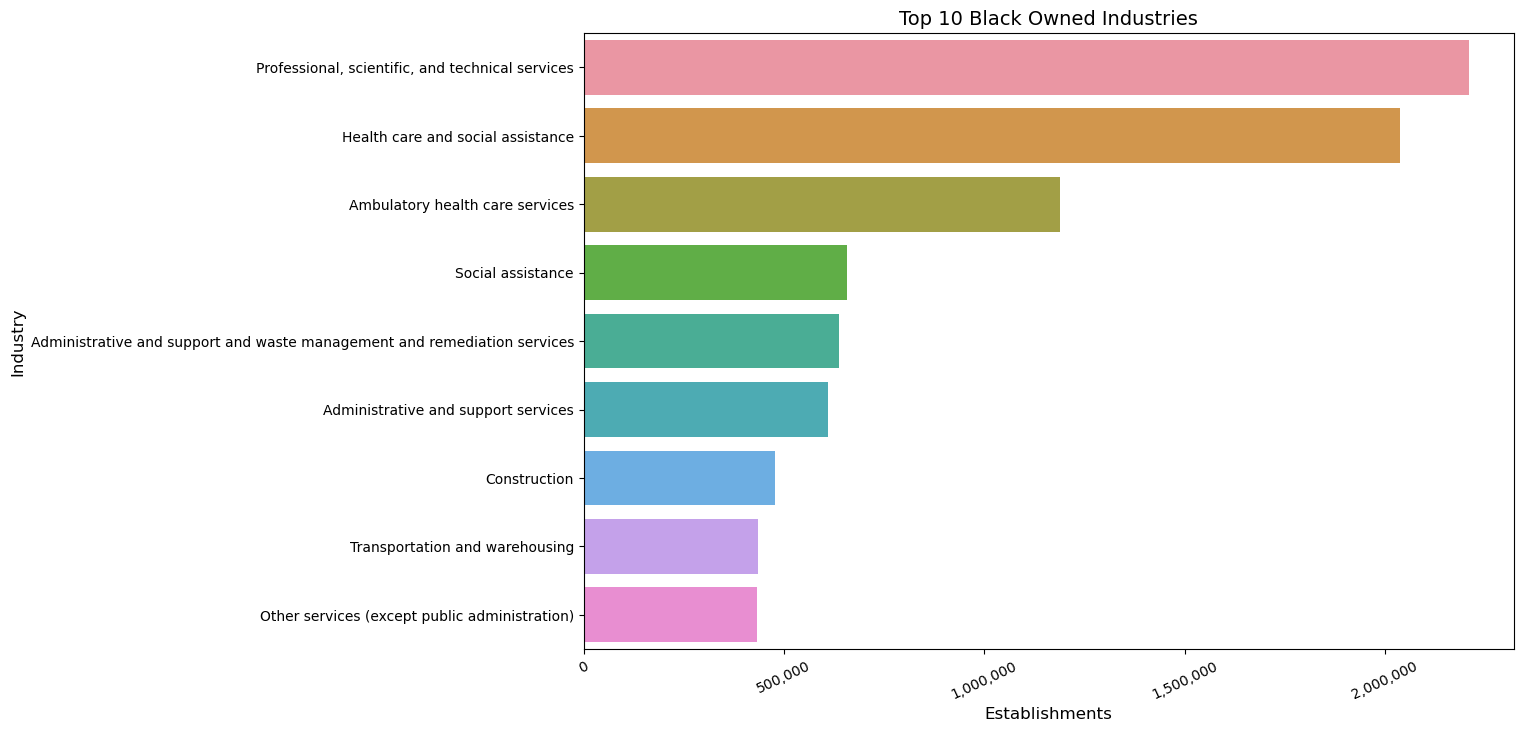

In [10]:
# Imported this to help fix formatting 
from matplotlib.ticker import FuncFormatter

sns.set_palette(palette = 'coolwarm')

#change size: 

plt.figure(figsize = (12,8))

#seaborn barplot

ax = sns.barplot(x= black_industry['EmployerFirms'], y = black_industry['Industry'])
# Used this code to get rid of scientific notation and add commas to the numbers 
ax.xaxis.get_major_formatter().set_scientific(False)
def add_commas(x,pos):
    return '{:,}'.format(int(x))

ax.xaxis.set_major_formatter(FuncFormatter(add_commas))

#rotate tick marks
#add rotation in degrees

plt.xticks(rotation = 25)

#add descriptive title
plt.title('Top 10 Black Owned Industries', size = 14)
plt.xlabel('Establishments', size = 12)
plt.ylabel('Industry', size = 12);

In [12]:
#here I want to see what specific industries are female black owned 
# made a copy of the main table
business_f = business_characteristics.copy()
#filtered to only use these columns
business_f = business_f[['Industry','Sex','EmployerFirms', 'Pay', 'Race']]
# filtered to only have the sex female 
business_f = business_f[(business_f['Sex']=='Female')]
#did the same thing as my other table and got rid of useless rows
business_f = business_f[(business_f['Race'] != 'Total')&(business_f['Race'] !='Classifiable')&(business_f['Race']!='Unclassifiable')&(business_f['Race']=='Black or African American')]
business_f = business_f.groupby(['Industry','Sex', 'Race'],as_index=False).sum()
business_f.head(20)


,Industry,Sex,Race,EmployerFirms,Pay
0,Accommodation and food services,Female,Black or African American,43081,8722940
1,"Accounting, tax preparation, bookkeeping, and ...",Female,Black or African American,0,0
2,Activities related to credit intermediation,Female,Black or African American,0,0
3,Activities related to real estate,Female,Black or African American,0,0
4,Administrative and support and waste managemen...,Female,Black or African American,56377,20411309
5,Administrative and support services,Female,Black or African American,51183,18816903
6,"Advertising, public relations, and related ser...",Female,Black or African American,2954,683718
7,"Agencies, brokerages, and other insurance rela...",Female,Black or African American,0,0
8,"Agents and managers for artists, athletes, ent...",Female,Black or African American,0,0
9,Air transportation,Female,Black or African American,0,0


In [13]:
# top 5 industries that are female black owned 
blackf_industry = business_f.sort_values( by = 'EmployerFirms', ascending = False).head(6)
blackf_industry = blackf_industry[(blackf_industry['Industry'] != 'Total for all sectors')]
blackf_industry

,Industry,Sex,Race,EmployerFirms,Pay
76,Health care and social assistance,Female,Black or African American,380623,97654199
146,"Professional, scientific, and technical services",Female,Black or African American,269580,68404918
10,Ambulatory health care services,Female,Black or African American,173653,52959471
163,Social assistance,Female,Black or African American,168354,33588150
28,Child day care services,Female,Black or African American,86626,12896489


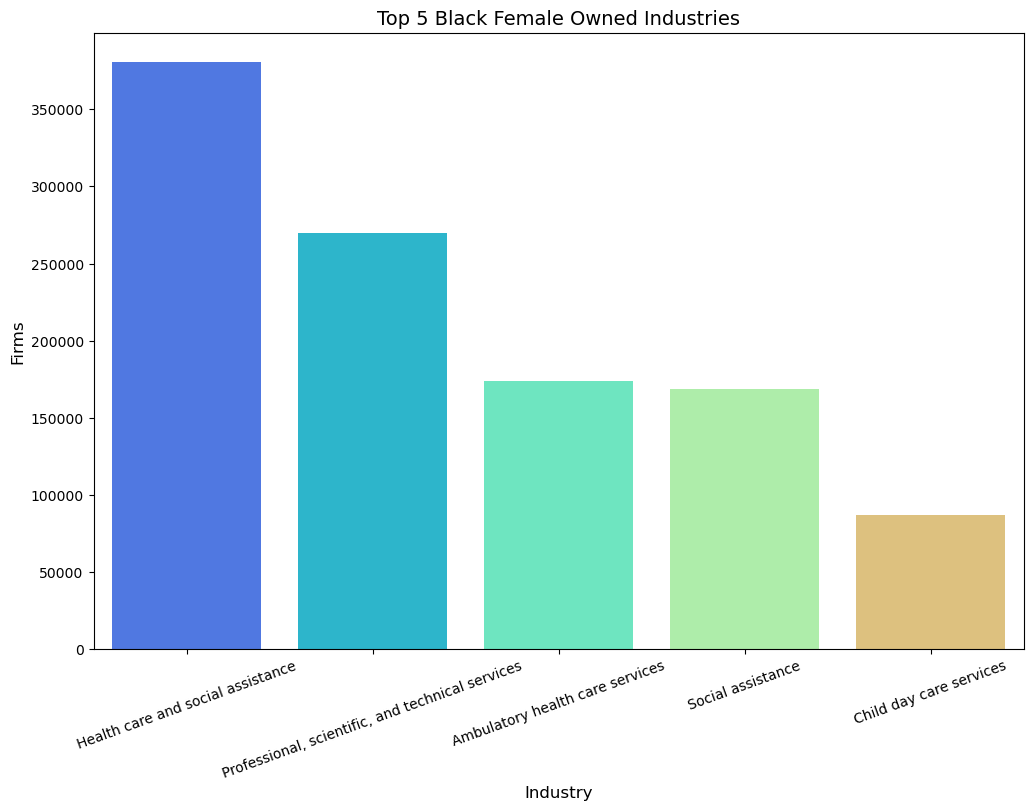

In [14]:
sns.set_palette(palette = 'rainbow')

#change size: 

plt.figure(figsize = (12,8))

#seaborn barplot

sns.barplot(x= blackf_industry['Industry'], y = blackf_industry['EmployerFirms'])
#rotate tick marks
#add rotation in degrees

plt.xticks(rotation = 20)

#add descriptive title
plt.title('Top 5 Black Female Owned Industries', size = 14)
plt.xlabel('Industry', size = 12)
plt.ylabel('Firms', size = 12);

In [17]:
#Wanted to compare top 10 white owned to top 10 black owned industries 
# used same code as black industry but changed race to white
business_w = business_characteristics.copy()
business_w = business_w [['Industry', 'Race', 'Pay', 'EmployerFirms']]
business_w = business_w[(business_w['Race'] != 'Total')&(business_w['Race'] !='Classifiable')&(business_w['Race']!='Unclassifiable')&(business_w['Race']=='White')]
business_w = business_w.groupby(['Industry','Race'],as_index=False).sum()
business_w.head(20)

,Industry,Race,Pay,EmployerFirms
0,Accommodation,White,655340438,1275820
1,Accommodation and food services,White,7073393646,18925140
2,"Accounting, tax preparation, bookkeeping, and ...",White,1888244924,6964544
3,Activities related to credit intermediation,White,468616299,607163
4,Activities related to real estate,White,1371486064,4286716
5,Administrative and support and waste managemen...,White,10410973192,17762167
6,Administrative and support services,White,9794561069,16806474
7,"Advertising, public relations, and related ser...",White,873115535,1693553
8,Aerospace product and parts manufacturing,White,82149958,37652
9,"Agencies, brokerages, and other insurance rela...",White,2239087663,7717398


In [18]:

# top 10 industries that are white owned 
white_industry = business_w.sort_values( by = 'EmployerFirms', ascending = False).head(10)
white_industry = white_industry[(white_industry['Industry'] != 'Total for all sectors')]
white_industry


,Industry,Race,Pay,EmployerFirms
266,"Professional, scientific, and technical services",White,39695224756,90721620
67,Construction,White,19244290891,39608026
135,Health care and social assistance,White,14632297174,28242638
282,Retail trade,White,10220138866,27230318
310,Specialty trade contractors,White,13005107240,25993915
15,Ambulatory health care services,White,11284245681,23586522
1,Accommodation and food services,White,7073393646,18925140
237,Other services (except public administration),White,3899965316,18174338
5,Administrative and support and waste managemen...,White,10410973192,17762167


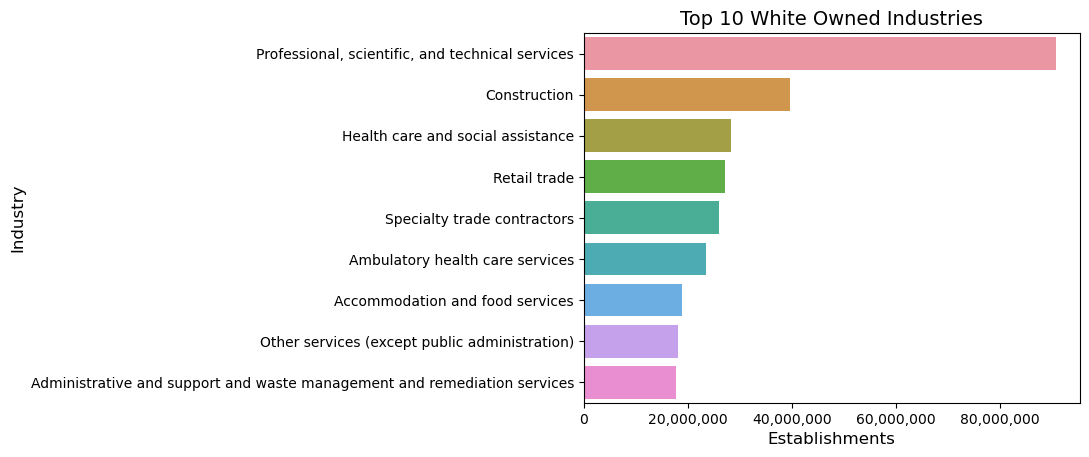

In [19]:
# imported this package to help formatting
from matplotlib.ticker import FuncFormatter

ax = sns.barplot(x = white_industry['EmployerFirms'], y = white_industry['Industry'])
# used the same code from above to change from scientific to regular integars and added commas 
ax.xaxis.get_major_formatter().set_scientific(False)
def add_commas(x,pos):
    return '{:,}'.format(int(x))

ax.xaxis.set_major_formatter(FuncFormatter(add_commas))

# added descriptions 
plt.title('Top 10 White Owned Industries', size = 14)
plt.ylabel('Industry', size = 12)
plt.xlabel('Establishments', size = 12);

 # Module Business Characteristics Visualizations


In [8]:
# Loading in dataframe
df = pd.read_csv("data/COVIDEFF-Data-Frame.csv")

In [9]:
# creating a dictionary statitics of the every NAICS2017 Label
job_list = list(df["NAICS2017_LABEL"].unique())
question = df['QDESC_LABEL'] == "COVIDEFF"
sub_question = list(df[question]['BUSCHAR_LABEL'].unique())

all_jobs = {}
for j in range(0, len(job_list)):
        job = job_list[j]

        all_firms = len(df[df['NAICS2017_LABEL'] == job])

        df2 = pd.concat([df[question][df['BUSCHAR_LABEL'] == sub_question[1]], df[question][df['BUSCHAR_LABEL'] == sub_question[2]]])
        increase_firms = len(df2[df2['NAICS2017_LABEL'] == job])
        increase_firms_pct = ((increase_firms/all_firms) * 100)

        df3 = pd.concat([df[question][df['BUSCHAR_LABEL'] == sub_question[4]], df[question][df['BUSCHAR_LABEL'] == sub_question[5]]])
        decrease_firms = len(df3[df3['NAICS2017_LABEL'] == job])
        decrease_firms_pct = ((decrease_firms/all_firms) * 100)

        df4 = df[question][df['BUSCHAR_LABEL'] == sub_question[3]]
        stagnant_firms = len(df4[df4['NAICS2017_LABEL'] == job])
        stagnant_firms_pct = ((stagnant_firms/all_firms) * 100) 

                
        diff = increase_firms_pct - decrease_firms_pct
        all_jobs.update({job : {"Percent Increase" : increase_firms_pct, "Percent Decrease" : decrease_firms_pct, "Percent Difference Between Increase and Decrease" : diff, "Percent Stagnant" : stagnant_firms_pct }})



In [10]:
keys = list(all_jobs.keys())

job_stats = df['NAICS2017_LABEL'].copy()
for i in range(0, len(keys)):
    job_stats.replace(keys[i], i, inplace=True)
df.insert(0, column = "NAICS2017_LABEL_INDEX", value = job_stats)

In [11]:
job_stats = pd.DataFrame(pd.DataFrame(data = all_jobs).transpose())
job_stats.insert(0, column= "NAICS2017_LABEL", value = keys)
job_stats.insert(0, column='NAICS2017_LABEL_INDEX', value = [i for i in range(0, 367)] )
job_stats.set_index("NAICS2017_LABEL_INDEX", inplace= True)

In [21]:
n = 10
top_n_industries = sorted(
    all_jobs.items(), 
    key = lambda x : ((x[1]['Percent Increase'] > x[1]['Percent Decrease']) and (x[1]['Percent Increase'] > x[1]['Percent Stagnant']), x[1]['Percent Increase']), 
    reverse = True)[:n]
bottom_n_industries = sorted(
    dict(top_n_industries).items(), 
    key = lambda x : (x[1]["Percent Difference Between Increase and Decrease"]),
    reverse = False)[:n]

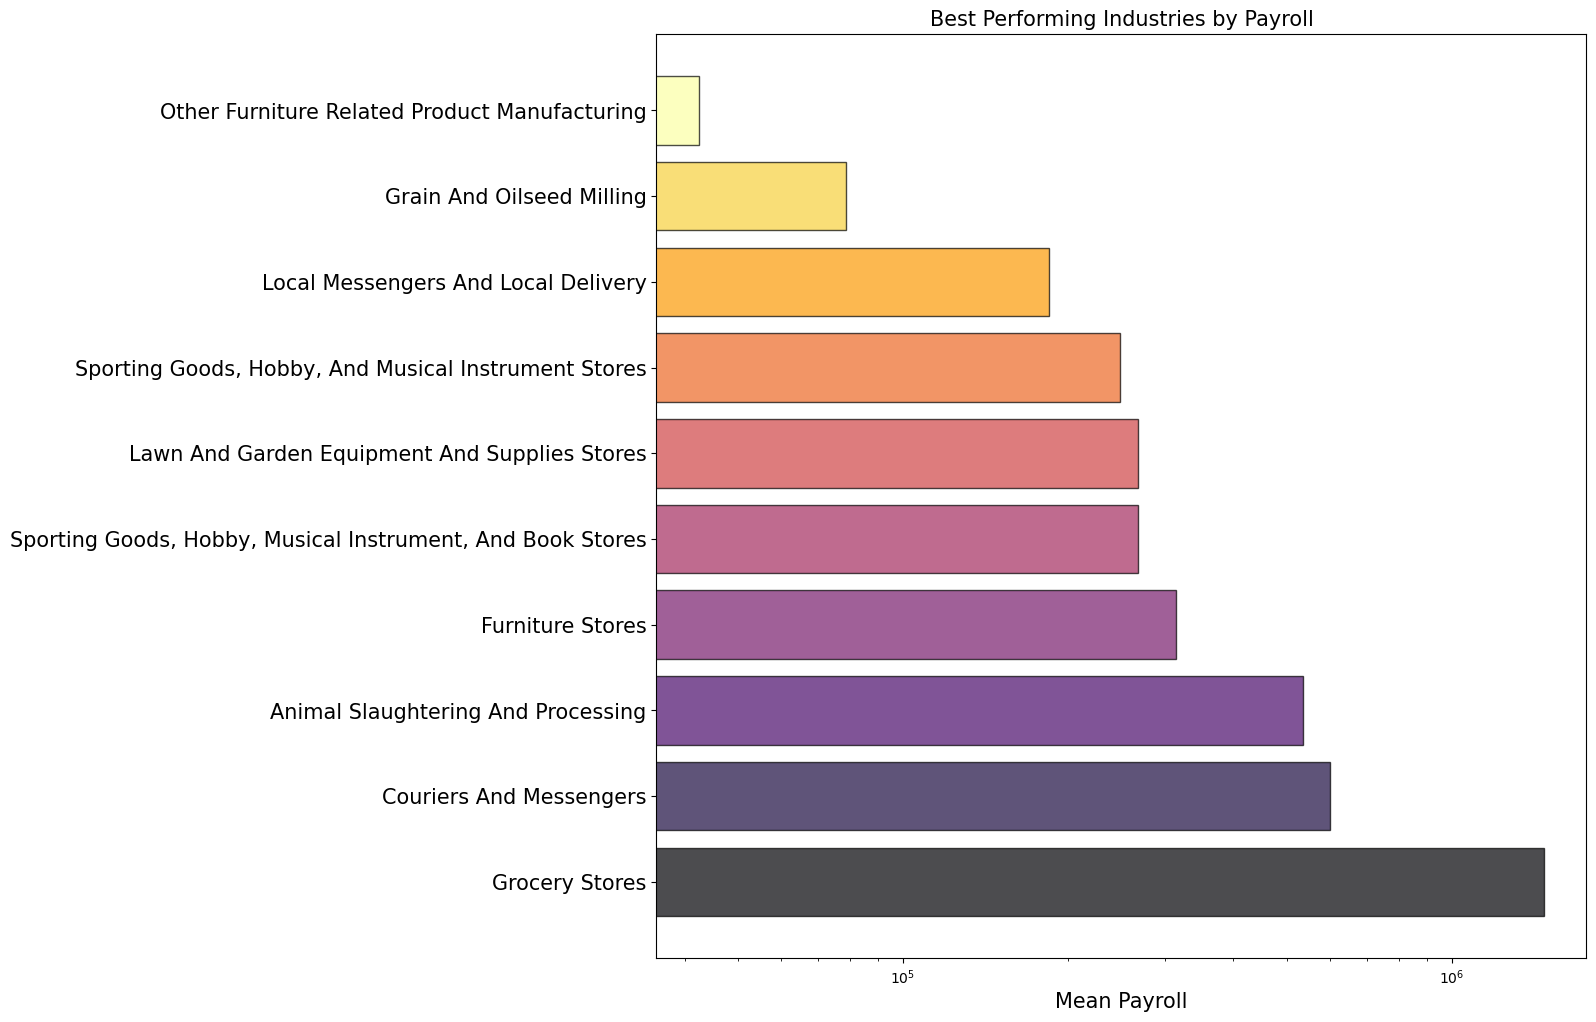

In [15]:
fig, ax = plt.subplots(1, 1, figsize= (12,12))

top_n = []
for i in range(0,len(top_n_industries)):
    top_n.append(top_n_industries[i][0])


colors = plt.cm.get_cmap('inferno', len(top_n))

condition = df['NAICS2017_LABEL'].isin(top_n)
df_tmp = df[condition].groupby("NAICS2017_LABEL").mean()
new_df = df_tmp.sort_values(by='PAYANN', ascending=False)
index = list(new_df.index)



for i in range(0, len(top_n)):
    industry = index[i]
    ax.barh(
        y = industry.title(),
        width = new_df.loc[industry]['PAYANN'],
        color= colors(i),
        align = 'center', 
        edgecolor = 'black',
        linewidth = 1.0,
        alpha = .7,
        log = True
    )
plt.yticks(size=15)
plt.title("Best Performing Industries by Payroll", size = 15)
plt.xlabel("Mean Payroll", size = 15)
fig.tight_layout;
plt.show()
   


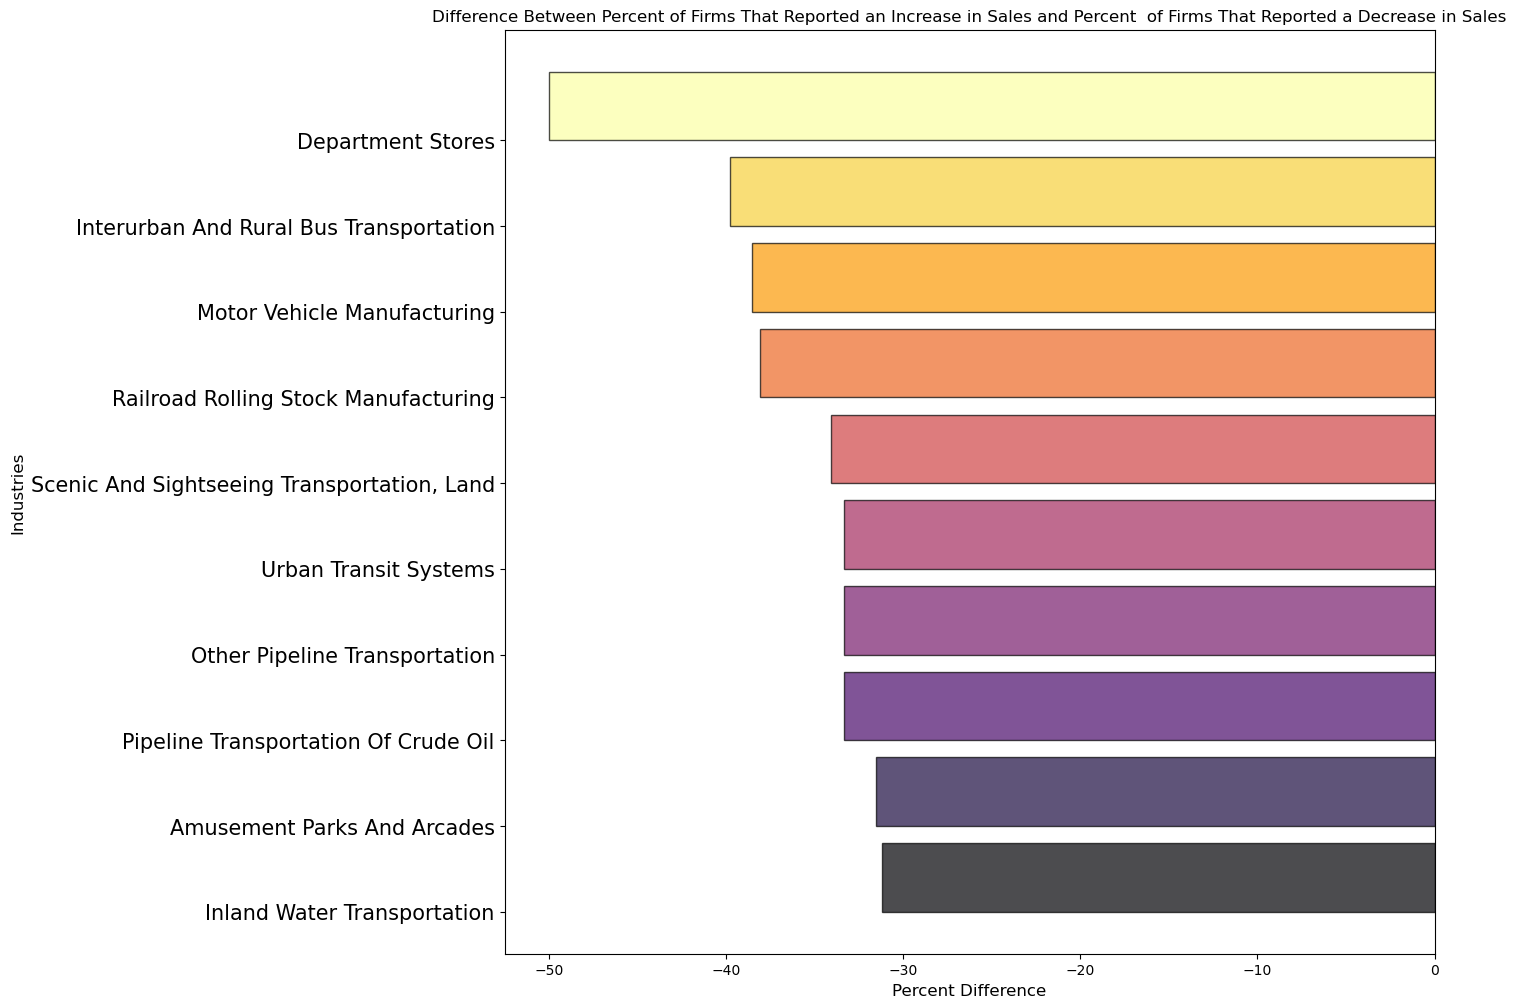

In [24]:
fig, ax = plt.subplots(1, 1, figsize= (12,12))

n = 10

colors = plt.cm.get_cmap('inferno', len(top_n))

top_n_industries = sorted(
    all_jobs.items(), 
    key = lambda x : ((x[1]['Percent Increase'] > x[1]['Percent Decrease']) and (x[1]['Percent Increase'] > x[1]['Percent Stagnant']), x[1]["Percent Increase"]),
    reverse = False)[:n]

top_n_industries2 = sorted(
    dict(top_n_industries).items(), 
    key = lambda x : (x[1]["Percent Difference Between Increase and Decrease"]),
    reverse = True)[:n]


variable = top_n_industries2
top_n = []
for i in range(0, n):
    top_n.append(variable[i][0])


for i in range(0, len(top_n)):
    ax.barh(
        y = top_n[i].title(),
        width = [all_jobs[top_n[i]]["Percent Difference Between Increase and Decrease"]],
        color= colors(i), 
        edgecolor = 'black',
        linewidth = 1.0,
        alpha = .7,
        align = 'edge'
    )

plt.yticks(
    size = 15)
plt.xlabel(
    'Percent Difference',
    size = 12)
plt.ylabel(
    'Industries',
    size = 12)
plt.title('Difference Between Percent of Firms That Reported an Increase in Sales and Percent  of Firms That Reported a Decrease in Sales')
plt.show()




   


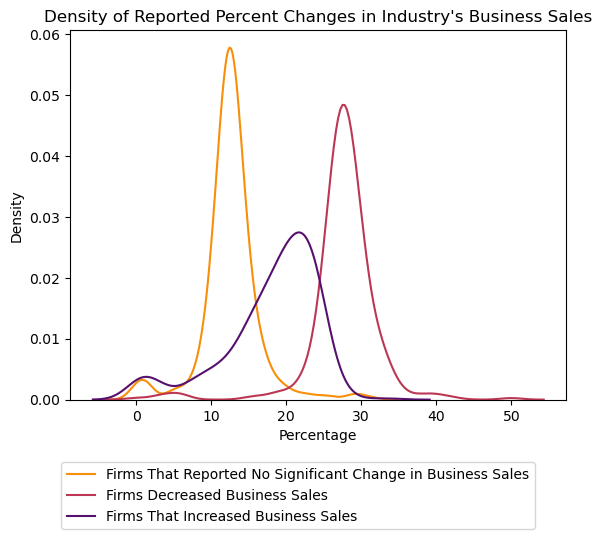

In [25]:

condition = (job_stats['NAICS2017_LABEL'].isin(top_n))
columns = ['Percent Increase', 'Percent Decrease', 'Percent Stagnant']

sns.kdeplot(data=job_stats[columns], palette='inferno')
plt.xlabel('Percentage')
plt.legend(labels = ['Firms That Reported No Significant Change in Business Sales', 'Firms Decreased Business Sales', 'Firms That Increased Business Sales'], bbox_to_anchor=(.95,-.15))
plt.title('Density of Reported Percent Changes in Industry\'s Business Sales')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


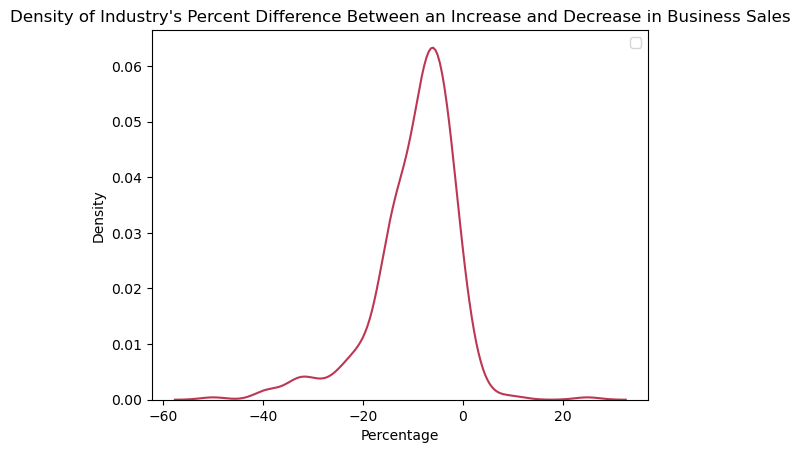

In [27]:
columns = ['Percent Difference Between Increase and Decrease']
sns.kdeplot(data=job_stats[columns], palette= 'inferno')
plt.xlabel('Percentage')
plt.title('Density of Industry\'s Percent Difference Between an Increase and Decrease in Business Sales')
plt.legend()
plt.show();

## Characteristics of Business Owners

In [2]:
#Functions to load and filter seleted data
def load_data(year_clean):
    df = pd.read_csv('characteristics-of-business-owners-' + str(year_clean) + '.csv')
    df.drop(['Unnamed: 0'], axis = 1, inplace = True)
    print(f'{year_clean} data has been loaded.')
    return df

def further_cleaning(data):
    for col in ['Owner_Sex', 'Owner_Ethnicity', 'Veteran_Status']:
        rows = []
        for i in range(len(data)):
            if (not re.search('All',data.iloc[i][col])):
                rows.append(i)
        data.drop(rows, axis = 0, inplace = True)
        data.reset_index(drop = True, inplace = True)
        
    for col in ['Business_Sector', 'Owner_Response']:    
        rows = []
        for i in range(len(data)):
            if (re.search('Total',data.iloc[i][col])):
                rows.append(i)
        data.drop(rows, axis = 0, inplace = True)
        data.reset_index(drop = True, inplace = True)

    for race in ['All', 'inority']:
        rows = []
        for i in range(len(data)):
            if (re.search(race,data.iloc[i]['Owner_Race'])):
                rows.append(i)
        data.drop(rows, axis = 0, inplace = True)
        data.reset_index(drop = True, inplace = True)

def select(data, question):
    selected_data = data[data['Question']==question]
    selected_data.reset_index(drop = True, inplace = True)
    further_cleaning(selected_data)
    return selected_data

In [3]:
# Load in 2017 dataset (This step should be done after running ETL) 
data_17 = load_data('2017_clean')

# Selected three survey responses to examine: Highest level of education completed, Reason for owning business and whether
# or not business income is used as primary income
edu_lvl = select(data_17,'EDUC')
value = select(data_17,'REASONOWN')
inc = select(data_17,'PRIMINC')

2017_clean data has been loaded.


c:\Users\Suzy\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


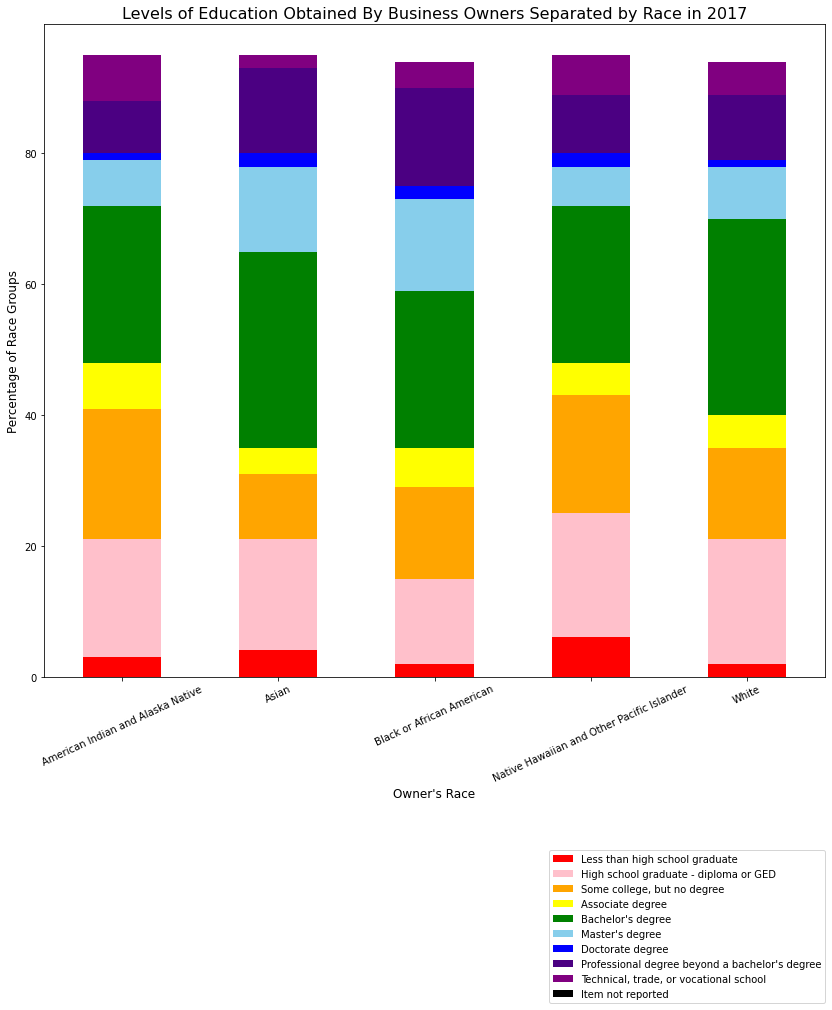

In [4]:
# Bar plot of spread of highest education level completed across different races
total = edu_lvl.groupby(['Owner_Race']).sum()['Number_of_Responses']
parts = edu_lvl.groupby(['Owner_Race', 'Owner_Response']).sum()['Number_of_Responses']
percentage = parts.unstack()
for col in percentage.columns:
    for i in range(len(percentage)):
        percentage.iloc[i][col]= percentage.iloc[i][col]*100.0/total[i]
percentage = percentage[['Less than high school graduate', 'High school graduate - diploma or GED', 'Some college, but no degree', 'Associate degree', 'Bachelor\'s degree', 'Master\'s degree', 'Doctorate degree', 'Professional degree beyond a bachelor\'s degree', 'Technical, trade, or vocational school', 'Item not reported']]

plt.rcParams["figure.figsize"] = (14,12)
percentage.plot(kind='bar', stacked=True, color = ['red', 'pink', 'orange', 'yellow', 'green', 'skyblue', 'blue', 'indigo', 'purple', 'black']);
plt.legend(bbox_to_anchor=(1, -0.5), loc='lower right', borderaxespad=0);
plt.title('Levels of Education Obtained By Business Owners Separated by Race in 2017',size = 16)
plt.xlabel('Owner\'s Race', size = 12)
plt.ylabel('Percentage of Race Groups', size = 12);
plt.xticks(rotation = 25);

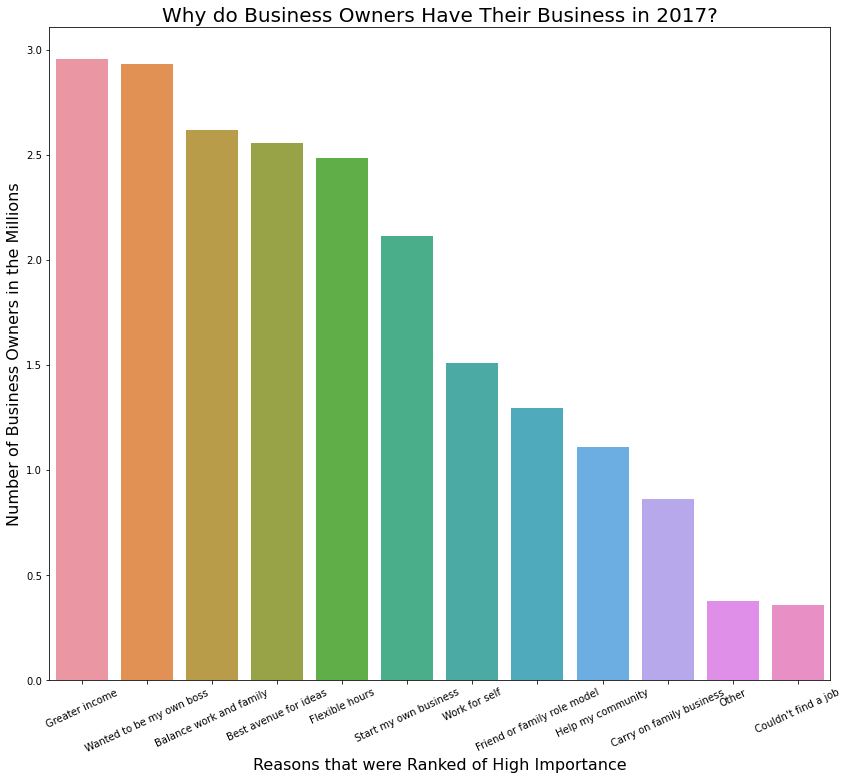

In [5]:
# Reasons why business owners own their business
reasons = ['Balance work and family', 'Best avenue for ideas', 'Carry on family business', 'Couldn\'t find a job', 'Flexible hours', 'Friend or family role model', 'Greater income', 'Help my community', 'Other', 'Start my own business', 'Wanted to be my own boss', 'Work for self']
importance = ['Reasons','Very important', 'Somewhat important', 'Not important']

group = value.groupby(['Owner_Response'], as_index = False).sum()

lis = {}
for x in reasons:
    lis['reason'] = reasons
for n in range(1, len(importance)):
    lis[importance[n]] = []
    for x in reasons:
        for i in range(len(group)):
            if (re.search(x, group.iloc[i]['Owner_Response'])):
                if (re.search(importance[n], group.iloc[i]['Owner_Response'])):
                    lis[importance[n]].append(group.iloc[i]['Number_of_Responses']/1000000)
reasonown = pd.DataFrame(lis)
reasonown = reasonown.sort_values(by=['Very important'], ascending=False)

sns.set_palette(palette = 'rainbow')
sns.barplot(x = reasonown['reason'], y = reasonown['Very important']);
plt.title('Why do Business Owners Have Their Business in 2017?',size = 20)
plt.xlabel('Reasons that were Ranked of High Importance', size = 16)
plt.ylabel('Number of Business Owners in the Millions', size = 16);
plt.xticks(rotation = 25);

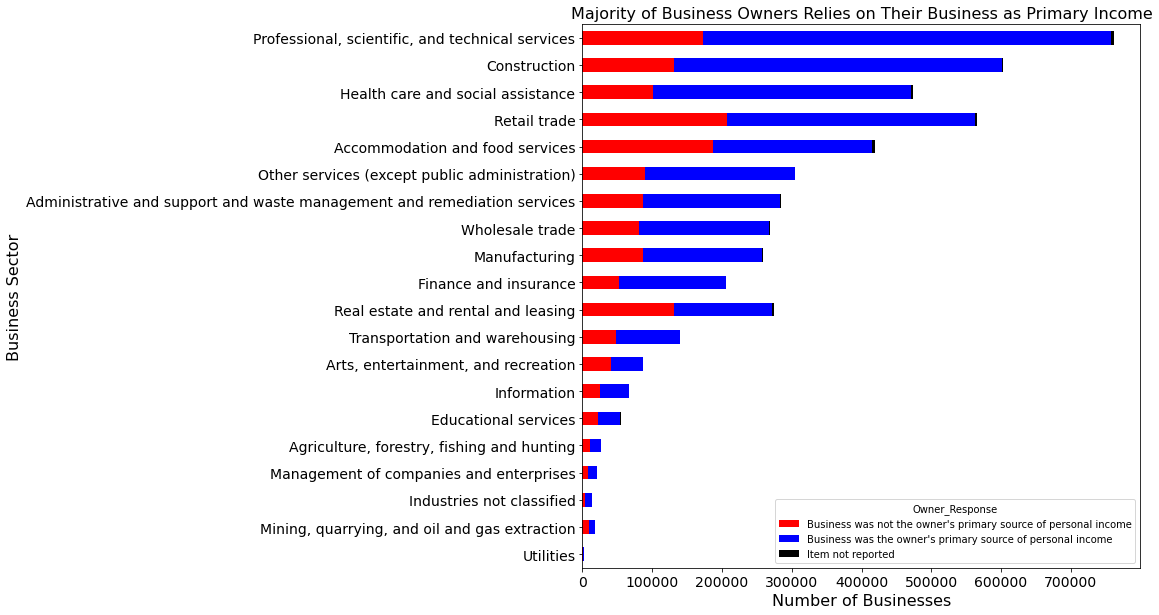

In [6]:
# Is the business the primary source of income
graph = inc.groupby(['Business_Sector','Owner_Response']).agg(sum)['Number_of_Responses']
graph
image = graph.unstack().sort_values('Business was the owner\'s primary source of personal income', ascending=True)
image
plt.rcParams["figure.figsize"] = (10,10)
image.plot(kind='barh', stacked=True, color = ['red', 'blue', 'black', 'green', 'yellow', 'purple', 'orange', 'skyblue']);
plt.title('Majority of Business Owners Relies on Their Business as Primary Income',size = 16)
plt.xlabel('Number of Businesses', size = 16)
plt.ylabel('Business Sector', size = 16);
# sns.barplot(x = graph['Owner_Response'], y = graph['Number_of_Responses'], hue = graph['Owner_Race']);
plt.xticks(size = 14);
plt.yticks(size = 14);